In [47]:
from cdl_helper import read_in_all_matches

df = read_in_all_matches()
df.sample(4)

,gameMap,gameMode,id,programId,firstName,lastName,alias,headshot,socialNetworkHandles,averageSpeed,highestStreak,untradedKills,untradedDeaths,tradedKills,tradedDeaths,inapplicableTradedKills,inapplicableTradedDeaths,damageTaken,damageHealed,tacticalsUsed,lethalsUsed,percentTimeMoving,deadSilenceTime,hillTime,contestedHillTime,totalKills,totalDeaths,totalAssists,totalScore,totalShotsFired,totalShotsHit,totalShotsHead,totalDamageDealt,friendDamage,totalTimeAlive,totalDistanceTraveled,highestMultikill,totalAces,totalInVictimFovKills,totalDefuserKills,...,abbrev,bombsPlanted,bombsDefused,sneakDefuses,totalObjectivesCaptured,objectiveTiersContributed,matchGame.id,matchGame.matchId,matchGame.number,matchGame.createdAt,matchGame.updatedAt,matchGame.gameMap.Version,matchGame.gameMap.locale,matchGame.gameMap.uid,matchGame.gameMap.InProgress,matchGame.gameMap.abbreviatedName,matchGame.gameMap.createdAt,matchGame.gameMap.createdBy,matchGame.gameMap.description,matchGame.gameMap.desktopImage.src,matchGame.gameMap.displayName,matchGame.gameMap.mapId,matchGame.gameMap.mobileImage.src,matchGame.gameMap.shareStatsImage.src,matchGame.gameMap.tags,matchGame.gameMap.title,matchGame.gameMap.updatedAt,matchGame.gameMap.updatedBy,matchGame.gameMap.publishDetails.environment,matchGame.gameMap.publishDetails.locale,matchGame.gameMap.publishDetails.time,matchGame.gameMap.publishDetails.user,matchGameResult.hostGameScore,matchGameResult.guestGameScore,matchGameResult.winnerTeamId,matchGameResult.loserTeamId,event,setting,totalHeadshots,totalTiersCaptured
6,Breenbergh Hotel,CDL Hardpoint,572,2,Daniel,Rothe,Ghosty,https://telescope.callofduty.com/ts/codp/conte...,[],200.033386,2.0,7.0,17.0,8.0,5.0,0.0,0.0,2548.0,348.0,12.0,13.0,97.0,0.0,24.0,9.0,15.0,22.0,8.0,2590.0,332.0,70.0,9.0,1837.0,1.0,403856.0,53257.167969,0.0,0.0,12.0,0.0,...,TX,NaN,NaN,NaN,NaN,NaN,19837,8729,0,1665807882,1677274476,5,en-us,bltab7a33edbf6dcfc4,False,Breenbergh Hotel,2022-11-09T00:53:04.918Z,blt85aae568f2119ad8,Breenbergh Hotel,https://images.blz-contentstack.com/v3/assets/...,Breenbergh Hotel,Breenbergh Hotel,https://images.blz-contentstack.com/v3/assets/...,https://images.blz-contentstack.com/v3/assets/...,[],Breenburgh Hotel,2022-12-03T02:04:30.718Z,blt85aae568f2119ad8,blt32369acdba41f6a8,en-us,2022-12-05T10:02:00.334Z,blte5475d8d4c1a4efe,124.0,250.0,17.0,6.0,M3Qual,online,NaN,NaN
15,El Asilo,CDL SnD,517,2,Thomas,Ernst,Scrap,https://www.callofduty.com/content/dam/activis...,[],102.547523,7.0,8.0,5.0,1.0,0.0,1.0,1.0,952.0,271.0,4.0,2.0,72.0,65.0,NaN,NaN,10.0,6.0,1.0,1000.0,223.0,9.0,5.0,1178.0,0.0,732096.0,59833.953125,0.0,0.0,6.0,0.0,...,TOR,0.0,0.0,0.0,NaN,NaN,19588,8646,1,1665610006,1670633185,4,en-us,blta8928236fa0d4ea2,False,El Asilo,2022-11-09T00:53:24.477Z,blt85aae568f2119ad8,El Asilo,https://images.blz-contentstack.com/v3/assets/...,El Asilo,El Asilo,https://images.blz-contentstack.com/v3/assets/...,https://images.blz-contentstack.com/v3/assets/...,[],El Asilo,2022-11-09T21:44:50.211Z,blt42192c9dc0a8617f,blt32369acdba41f6a8,en-us,2022-12-05T10:02:49.938Z,blte5475d8d4c1a4efe,5.0,6.0,17.0,7.0,M1Qual,online,NaN,NaN
3,Breenbergh Hotel,CDL Hardpoint,264,2,Jamie,Craven,Insight,https://www.callofduty.com/content/dam/activis...,[],162.314301,3.0,12.0,11.0,6.0,7.0,0.0,0.0,2202.0,328.0,10.0,8.0,95.0,0.0,82.0,9.0,18.0,18.0,13.0,3520.0,396.0,89.0,7.0,2324.0,1.0,424992.0,43310.890625,0.0,0.0,17.0,0.0,...,TOR,NaN,NaN,NaN,NaN,NaN,19837,8729,0,1665807882,1677274476,5,en-us,bltab7a33edbf6dcfc4,False,Breenbergh Hotel,2022-11-09T00:53:04.918Z,blt85aae568f2119ad8,Breenbergh Hotel,https://images.blz-contentstack.com/v3/assets/...,Breenbergh Hotel,Breenbergh Hotel,https://images.blz-contentstack.com/v3/assets/...,https://images.blz-contentstack.com/v3/assets/...,[],Breenburgh Hotel,2022-12-03T02:04:30.718Z,blt85aae568f2119ad8,blt32369acdba41f6a8,en-us,2022-12-05T10:02:00.334Z,blte5475d8d4c1a4efe,124.0,250.0,17.0,6.0,M3Qual,online,NaN,NaN
19,Al Bagra Fortress,CDL Control,223,2,Reece,Drost,Vivi

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cdl_helper import CDL_PALETTE as pal
pal

{'NY': 'yellow',
 'LV': 'orange',
 'BOS': '#0bf52b',
 'FLA': 'cyan',
 'MIN': 'purple',
 'TOR': '#f40afe',
 'ATL': '#f84c4c',
 'TX': 'green',
 'LAT': 'red',
 'LAG': '#7a0265',
 'SEA': 'blue',
 'LDN': '#800020'}

In [62]:
df['matchDesc'] = [f"{player} vs {op}\n({event})" for player, op, event in zip(df['alias'], df['oppo_abbrev'], df['event'])]
df['matchDesc'][:3]

0    Cellium vs BOS\n(M1Qual)
1    Methodz vs ATL\n(M1Qual)
2       Simp vs BOS\n(M1Qual)
Name: matchDesc, dtype: object

<AxesSubplot:xlabel='matchDesc'>

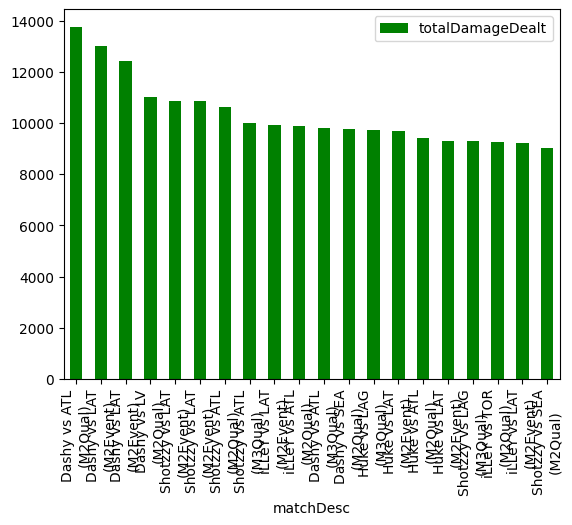

In [77]:
refined = df[['matchDesc', 'abbrev', 'totalDamageDealt', 'matchGame.matchId']]
damage_df = refined.groupby(['matchDesc', 'abbrev', 'matchGame.matchId']).sum().reset_index()
tx_dam = damage_df[damage_df['abbrev']=='TX'].sort_values(by='totalDamageDealt', ascending=False).reset_index().drop('index', axis=1)
tx_dam[['matchDesc', 'totalDamageDealt']].iloc[0:20].set_index('matchDesc').plot(kind="bar", color='green')

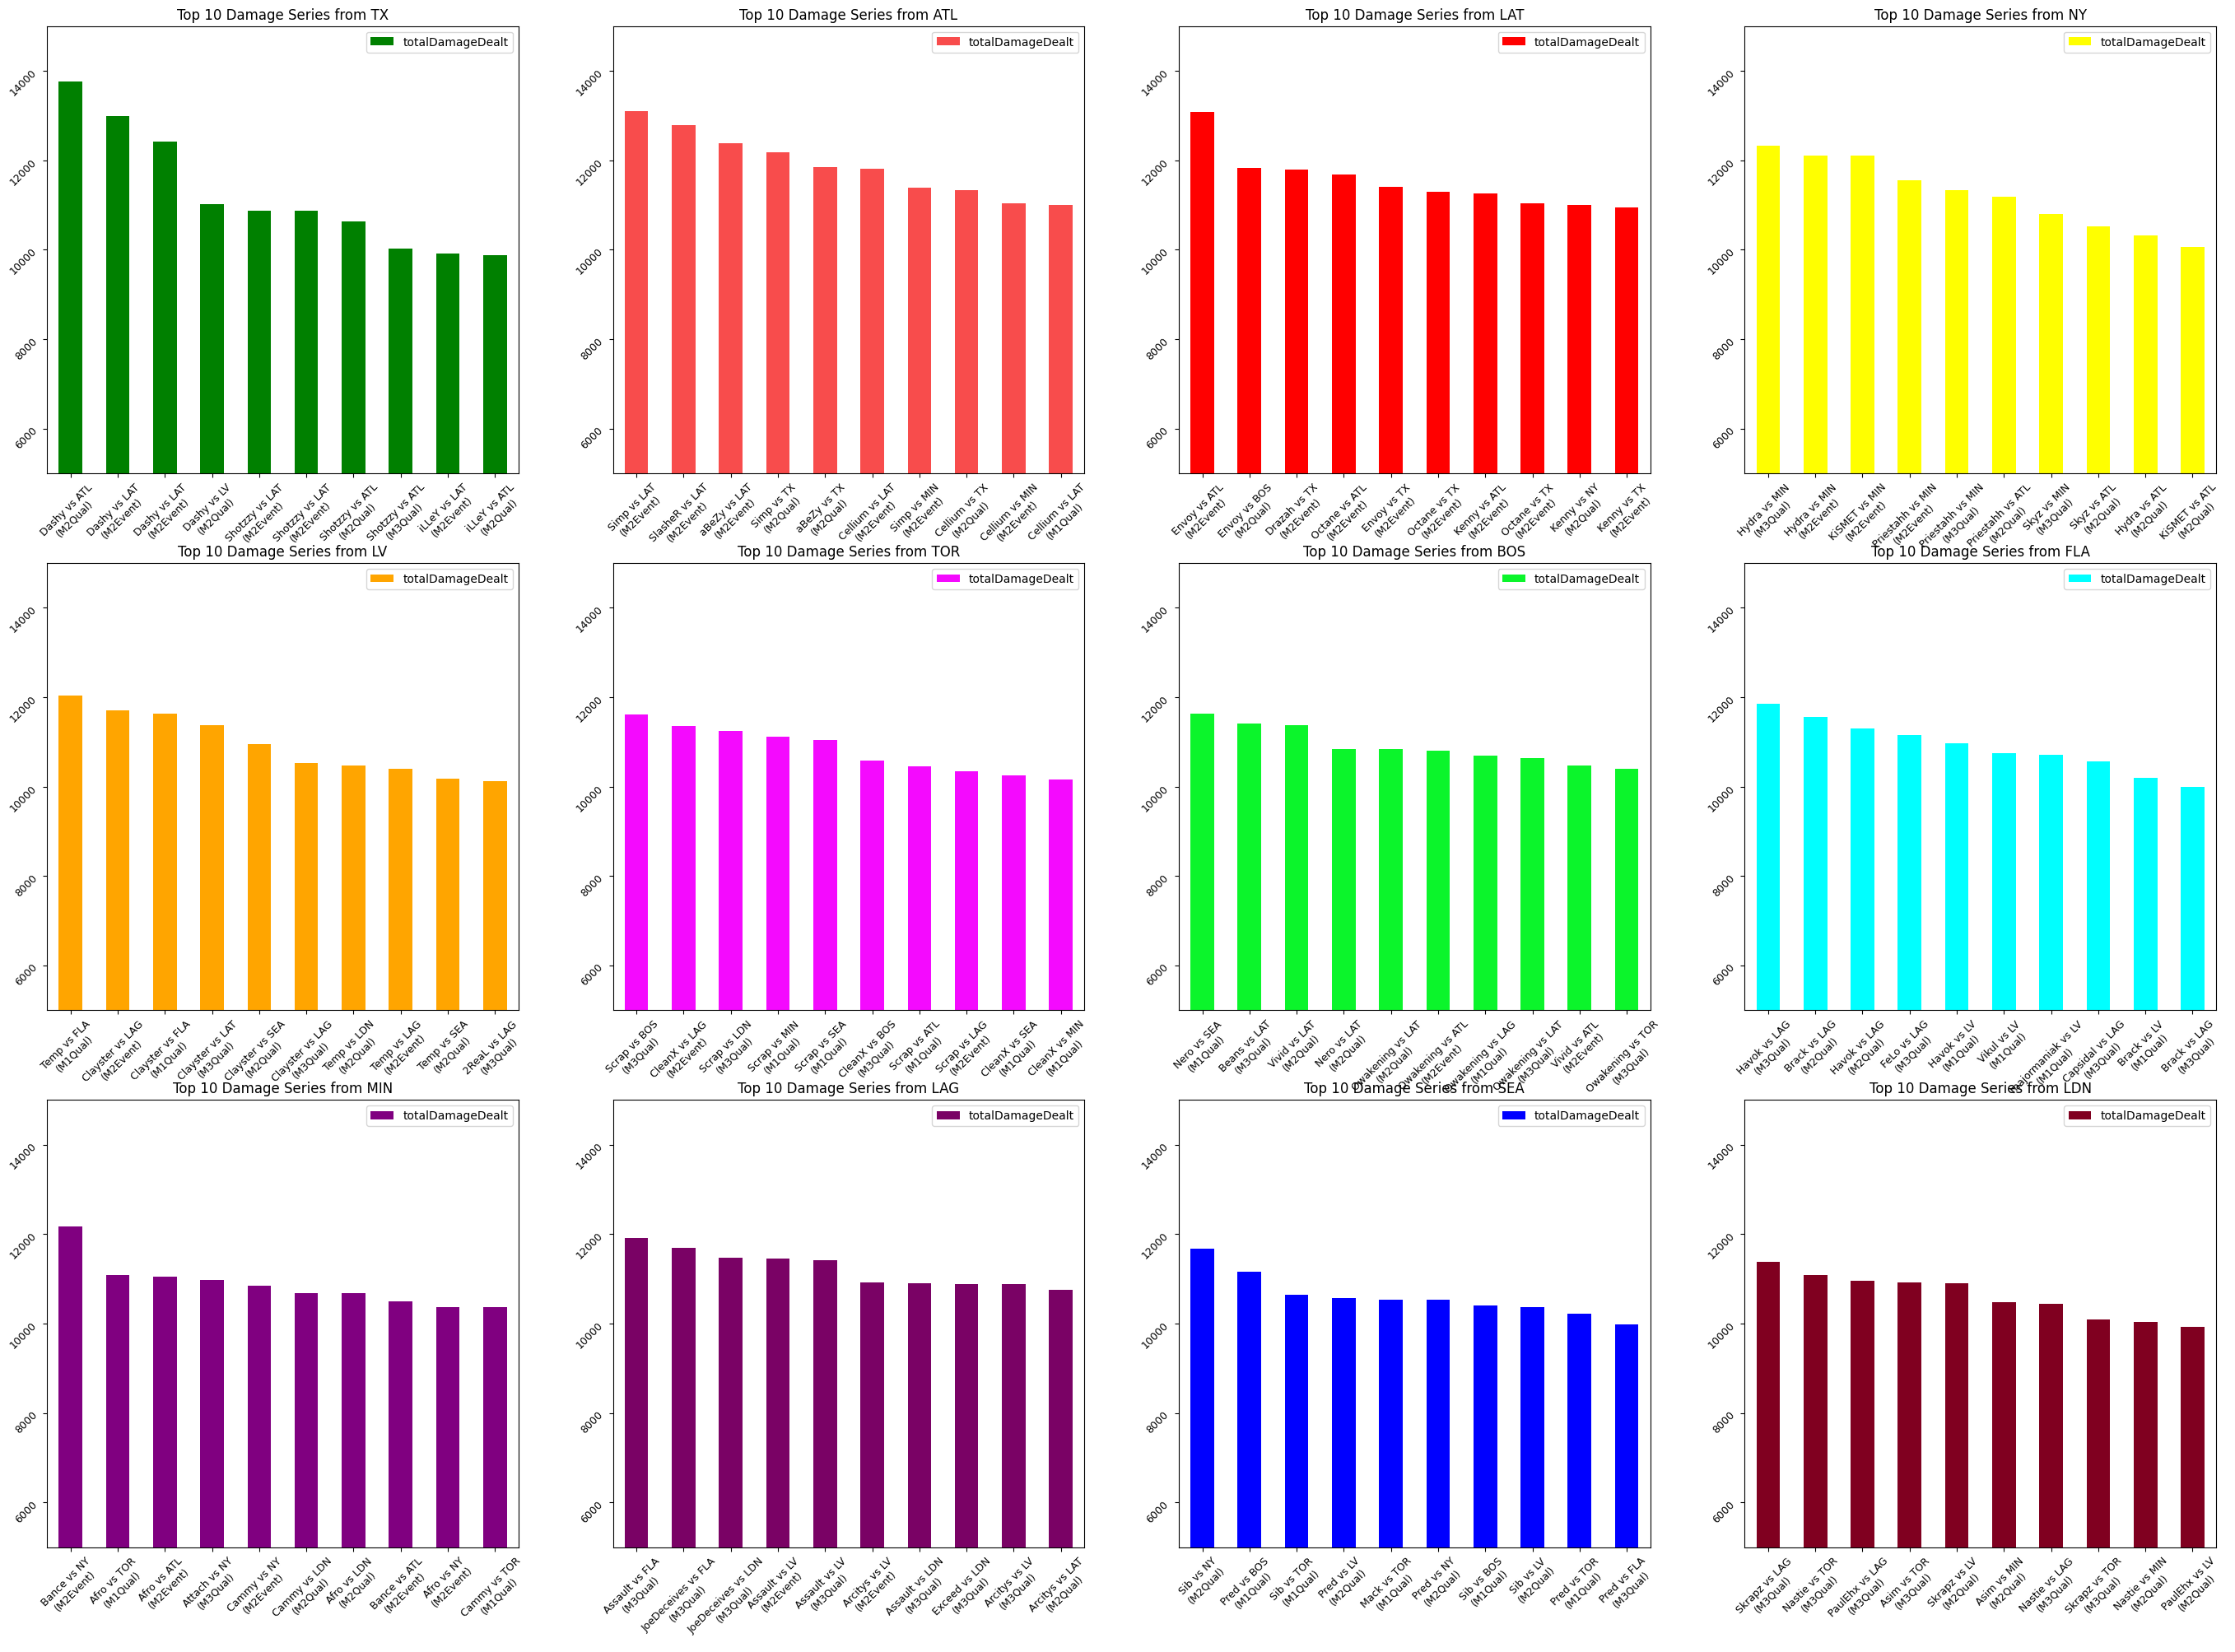

In [104]:

fig = plt.figure(figsize=(34, 24))
axes = [((x for i in range(4)) for i in range(3))] 
axes = fig.subplots(ncols=4, nrows=3)

damage_df = damage_df.sort_values('totalDamageDealt', ascending=False)
teams = (('TX', 'ATL', 'LAT', 'NY'), ('LV', 'TOR', 'BOS', 'FLA'), ('MIN', 'LAG', 'SEA', 'LDN'))
for i in range(len(teams)):
    for j in range(4):
        refined_df = damage_df[damage_df['abbrev']==teams[i][j]]
        refined.sort_values('totalDamageDealt', ascending=False)
        refined_df[['matchDesc', 'totalDamageDealt']].iloc[0:10].set_index('matchDesc').plot(kind='bar', ax=axes[i][j], color=pal[teams[i][j]])
        axes[i][j].set_title(f"Top 10 Damage Series from {teams[i][j]}")
        axes[i][j].tick_params(rotation=45, labelsize=9)
        axes[i][j].set(xlabel=None)
        axes[i][j].set_ylim(5000, 15000)

fig.savefig("top_10_dmg.png")
        



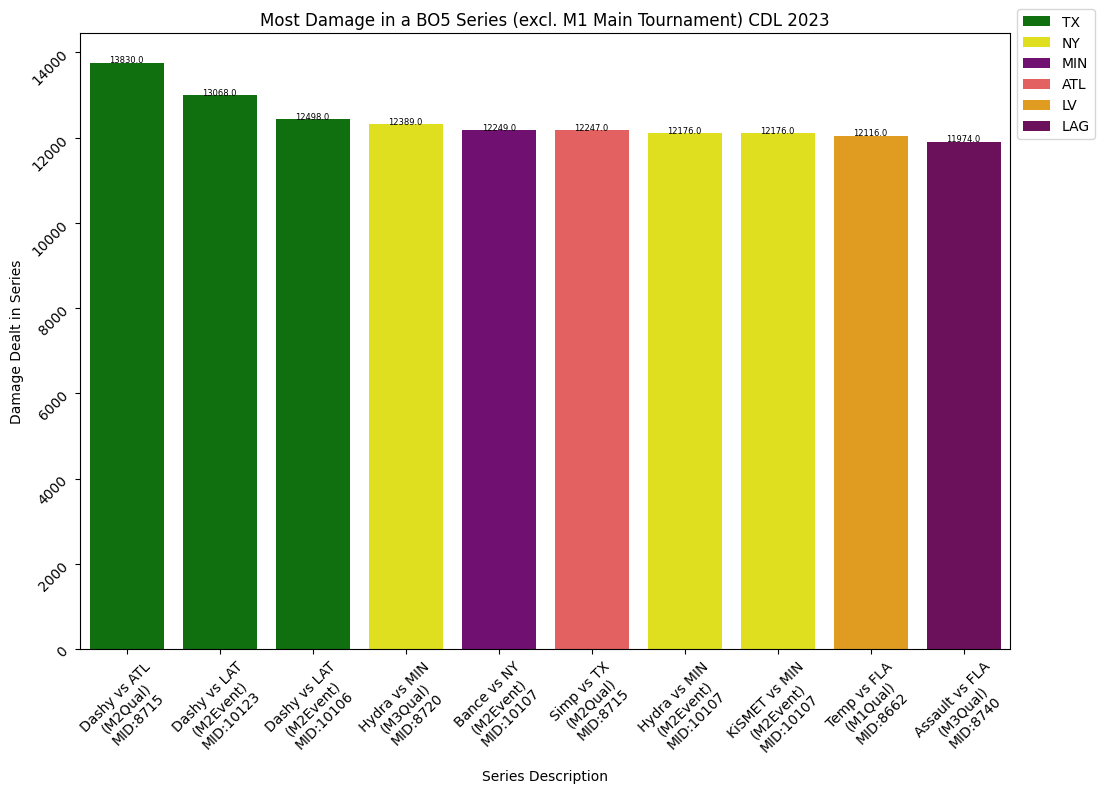

In [160]:
new_fig = plt.figure(figsize=(12, 8))
(ax1) = new_fig.subplots()
sorted_df = damage_df.sort_values('totalDamageDealt', ascending=False)
sorted_df['matchDesc'] = [f"{a}\nMID:{b}" for a, b in zip(sorted_df['matchDesc'], sorted_df['matchGame.matchId'])]
sorted_df = sorted_df[sorted_df['matchGame.matchId'] != 10113].drop(['level_0', 'index'], axis=1)
sns.barplot(data=sorted_df.iloc[0:10], x='matchDesc', y='totalDamageDealt', hue='abbrev', palette=pal, ax=ax1, dodge=False, errorbar=('ci', 0))
ax1.legend(bbox_to_anchor=(1, 1.05))
ax1.tick_params(rotation=45)
ax1.set_ylabel("Damage Dealt in Series")
ax1.set_xlabel("Series Description")
for x, y in zip(ax1.get_xticks(), sorted_df['totalDamageDealt']):
    ax1.text(x, y, s=y+70, horizontalalignment='center', fontsize=6)

ax1.set_title("Most Damage in a BO5 Series (excl. M1 Main Tournament) CDL 2023");
new_fig.savefig("dmg.png")